# Denoising OMM Data: Data Preparation notebook
In this notebook, we will take our HST COSMOS data and degrate them to OMM-like images

The HST resolution for WFC is 0.04 arcsec/pixel. PESTO has a resolution of 0.466 arcsec/pixel. 

We also are going to take cutouts that are 1024x1024 pixels which corresponds to the size of PESTO images.

Steps:

 - Read in data
 
 - Downgrade to a lower resolution
 
 - Take cutouts 

In [1]:
import h5py
import numpy as np
import scipy as sp
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
filename = "cosmos_23.5_128_augmented_denoised.h5"

with h5py.File(filename, "r") as f:
    a_group_key = list(f.keys())[0]
    # Get the data
    galaxies = list(f[a_group_key])
print('We have a total of %i galaxies'%len(galaxies))

We have a total of 47955 galaxies


We now have all the galaxies in a list called galaxies. Let's take a look at one!

(0.0, 128.0)

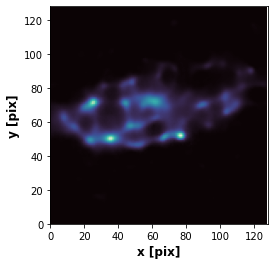

In [3]:
plt.imshow(np.arcsinh(galaxies[1]), cmap='mako')
plt.xlabel('x [pix]', fontweight='bold', fontsize='large')
plt.ylabel('y [pix]', fontweight='bold', fontsize='large')
plt.ylim(0,128)
plt.xlim(0,128)

## Making OMM-like images
In order to make this more applicable to OMM images, we are going to blur the image by a factor of 10 to represent the fact that mont megantic images have a seen 10 times worse.

In [5]:
galaxies_OMM = np.zeros((len(galaxies), 128, 128))  # List of galaxies resized to OMM sizes
ct = 0
for galaxy in tqdm(galaxies):  # Step through all galaxies
    galaxy_resized = resize(galaxy, (1024, 1024))  # Rescale to OMM size
    galaxy_resized_filtered = sp.ndimage.gaussian_filter(galaxy_resized, 10)  # Filter
    galaxy_resized = resize(galaxy, (128, 128))  # Rescale to smaller size for denoising
    galaxies_OMM[ct] = galaxy_resized
    ct += 1

100%|██████████| 47955/47955 [1:12:53<00:00, 10.97it/s]


(0.0, 128.0)

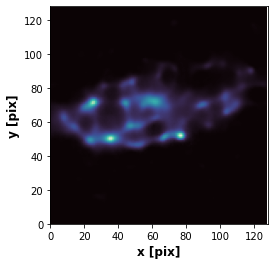

In [6]:
plt.imshow(np.arcsinh(galaxies_OMM[1]), cmap='mako')
plt.xlabel('x [pix]', fontweight='bold', fontsize='large')
plt.ylabel('y [pix]', fontweight='bold', fontsize='large')
plt.ylim(0,128)
plt.xlim(0,128)

In [7]:
# Save data as H5 file

In [8]:
hf = h5py.File('cosmos_OMM_clean.h5', 'w')
hf.create_dataset('OMM_Clean', data=galaxies_OMM)
hf.close()

## Add noise
The next step is to add reasonable noise to the image. We will start with simple gaussian noise.